# Transpose Demo for Jump

Transpose offers deep flexibility for accessing and integrating Ethereum data into analytics pipelines. Not only do we provide complete coverage of all ERC-20, ERC-721, ERC-777, ERC-1155 contract histories, sales and balances, but we allow this data to be queried from many useful angles.

This demo will demonstrate how our Python SDK can be used to carry out powerful analyses across blockchain data.


## Summary of topics covered
- Simple Example
- Collection Sales Summary
- Wallet NFT history
- Hotness of a particular collection
- Hot new NFT mints

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool
from dateutil import parser
from transpose.src.util.models import NFTTransfer, TokenTransfer
from datetime import timedelta, datetime
from transpose import Transpose
from pprint import pprint
import json
import os

API_KEY = 'gDvSKYoJJT7BckVawmrss6rzWHp4R2mdazwuyUXl'
api = Transpose(API_KEY)

In [2]:
def thread_ripper(endpoint, args_list):
    impl = lambda args: api.bulk_request(endpoint(**args))
    with Pool(30) as pool: return pool.map(impl, args_list)
    
def to_friendly_dt(dt_str) -> str:
    dt = parser.parse(dt_str)
    return dt.strftime("%B %d %Y")

BORED_APE_CONTRACT_ADDRESS = "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"

In [4]:
def calculate_usd_revenue(api: Transpose, contract_address: str, from_date: str, to_date: str) -> float:
    from_date = datetime.strptime(from_date, "%Y-%m-%d")
    to_date = datetime.strptime(to_date, "%Y-%m-%d")

    # get all sales for contract between from_date and to_date
    sales = api.bulk_request(api.nft.sales_by_contract_address(
        contract_address, from_date, to_date, limit=500), 20, 1000)

    # calculate USD revenue
    usd_revenue = 0
    for sale in sales:
        usd_revenue += sale.usd_price
    
    return usd_revenue

# Demo 1: NFT Collection Analysis

In [5]:

# first task: let's pull info about the Bored Ape collection!
bored_ape_collection = api.nft.collections_by_contract_address(BORED_APE_CONTRACT_ADDRESS)[0]

print('Name: {}'.format(bored_ape_collection.name))
print('Symbol: {}'.format(bored_ape_collection.symbol))
print('Standard: {}'.format(bored_ape_collection.standard))
print('Total NFTs: {}'.format(bored_ape_collection.count))
print('Created timestamp: {}'.format(bored_ape_collection.created_timestamp))
print('Description: {}'.format(bored_ape_collection.description[:80] + '...'))
print('Discord: {}'.format(bored_ape_collection.discord_url))
print('Website: {}'.format(bored_ape_collection.external_url))
print('Opensea: {}'.format(bored_ape_collection.opensea_url))

Name: BoredApeYachtClub
Symbol: BAYC
Standard: ERC-721
Total NFTs: 10000
Created timestamp: 2021-04-22T23:13:40Z
Description: The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique...
Discord: https://discord.gg/3P5K3dzgdB
Website: http://www.boredapeyachtclub.com/
Opensea: https://opensea.io/collection/boredapeyachtclub


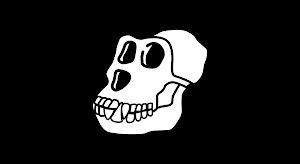

In [6]:

# let's display the Bored Ape Collection image using the Transpose CDN!
bored_ape_image = api.cdn.query(bored_ape_collection.image_url).image()
display(bored_ape_image)

In [7]:

# let's search for all contracts matching the name substring "bored" 
# all the ones we find beside the one we originally pulled are fakes!
fake_baycs = api.nft.collections_by_symbol('bayc', limit=30)

print('number of contracts matching "bored ape": {}'.format(len(fake_baycs)))
for fake_bayc in fake_baycs:
    is_real = bool(fake_bayc.contract_address == BORED_APE_CONTRACT_ADDRESS)
    print('Name: {}'.format(fake_bayc.name))
    print('Symbol: {}'.format(fake_bayc.symbol))
    print('Created: {}'.format(fake_bayc.created_timestamp))
    print('Is Real: {}\n'.format(is_real))

number of contracts matching "bored ape": 30
Name: WhaleEventsBAYC
Symbol: BAYCPASS
Created: 2022-05-27T08:51:45Z
Is Real: False

Name: BAYC Otherside Land
Symbol: BAYC
Created: 2022-04-27T22:10:20Z
Is Real: False

Name: Meta Bored Ape Yacht Club
Symbol: BAYC
Created: 2022-05-22T02:56:40Z
Is Real: False

Name: Highfive Names BAYC
Symbol: HIBAYC
Created: 2022-04-30T12:16:56Z
Is Real: False

Name: Bored Ape yAcTh Club #10001
Symbol: BAYC#10001
Created: 2022-06-11T05:16:56Z
Is Real: False

Name: RRRRBAYC
Symbol: RRRRBAYC
Created: 2022-06-21T05:06:06Z
Is Real: False

Name: ALXxBAYC
Symbol: ALXXBAYC
Created: 2021-07-19T06:48:16Z
Is Real: False

Name: BAYC Otherside Land
Symbol: BAYC
Created: 2022-04-29T15:48:33Z
Is Real: False

Name: BAYC Otherside Land
Symbol: BAYC
Created: 2022-04-27T07:51:57Z
Is Real: False

Name: BoredApeYachtClub
Symbol: BAYC
Created: 2022-06-20T19:07:47Z
Is Real: False

Name: BAYC Otherside Land
Symbol: BAYC
Created: 2022-04-26T10:47:46Z
Is Real: False

Name: Loot (fo

In [8]:

# let's pull the 5 most recently created collections
most_recent_collections = api.nft.collections_by_date_created(order='desc', limit=5)
for collection in most_recent_collections:
    print(collection.name)

Reflections of Soul Series/ Wine and Woman
My Digital Paintings
Youkai Soul
RugBurn
Gabagool.eth | Writing Token


In [9]:

# what data do we have access to?
print(json.dumps(bored_ape_collection.to_dict(), indent=4))

{
    "contract_address": "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D",
    "name": "BoredApeYachtClub",
    "symbol": "BAYC",
    "description": "The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs\u2014 unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of which is access to THE BATHROOM, a collaborative graffiti board. Future areas and perks can be unlocked by the community through roadmap activation. Visit www.BoredApeYachtClub.com for more details.",
    "created_timestamp": "2021-04-22T23:13:40Z",
    "standard": "ERC-721",
    "count": 10000,
    "external_url": "http://www.boredapeyachtclub.com/",
    "image_url": "https://cdn.transpose.io/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/image.png",
    "twitter_username": "BoredApeYC",
    "telegram_url": null,
    "discord_url": "https://discord.gg/3P5K3dzgdB",
    "is_nsfw": f

# Demo 2: Collection Sales Summary

In [10]:

# let's retrieve the last month of sales for bored apes
start_date = '2022-06-08'
recent_sales = api.bulk_request(api.nft.sales_by_contract_address(
    BORED_APE_CONTRACT_ADDRESS, limit=500, sold_after=start_date), 20, 100000)

print("Number of BAYC sales in last month: {}".format(len(recent_sales)))

Number of BAYC sales in last month: 514


In [11]:
usd_volume = 0
eth_volume = 0
daily_usd_volume = {}

for sale in recent_sales:
    usd_volume += sale.usd_price
    eth_volume += sale.eth_price
    date = parser.parse(sale.timestamp)
    day = date.strftime('%Y-%m-%d')
    if day not in daily_usd_volume:
        daily_usd_volume[day] = 0.0
    daily_usd_volume[day] += sale.usd_price

print('USD Volume: {}'.format(usd_volume))
print('ETH Volume: {}\n'.format(eth_volume))
print(json.dumps(daily_usd_volume, indent=4))

USD Volume: 60136390.3
ETH Volume: 49895.010264603996

{
    "2022-06-08": 1142585.13,
    "2022-06-09": 1997987.4300000002,
    "2022-06-10": 1852045.5399999998,
    "2022-06-11": 1758241.3899999997,
    "2022-06-12": 1731898.24,
    "2022-06-13": 7486950.0,
    "2022-06-14": 5327787.209999998,
    "2022-06-15": 3742268.12,
    "2022-06-16": 2493729.08,
    "2022-06-17": 1983390.8099999998,
    "2022-06-18": 1830101.85,
    "2022-06-19": 2406524.4,
    "2022-06-20": 2675171.659999999,
    "2022-06-21": 2237446.02,
    "2022-06-22": 1897703.6799999997,
    "2022-06-23": 814670.44,
    "2022-06-24": 1189797.67,
    "2022-06-25": 1258071.02,
    "2022-06-26": 2271692.51,
    "2022-06-27": 1685420.1400000001,
    "2022-06-28": 1892329.9300000004,
    "2022-06-29": 994552.19,
    "2022-06-30": 950105.4700000001,
    "2022-07-01": 1774836.95,
    "2022-07-02": 615068.3400000001,
    "2022-07-03": 692914.9600000001,
    "2022-07-04": 901755.45,
    "2022-07-05": 751052.96,
    "2022-07-06": 

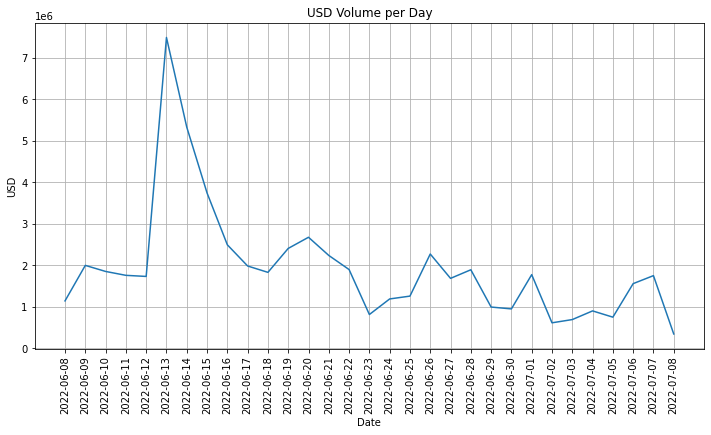

In [66]:
# let's plot the USD revenue per day
plt.figure(figsize=(12, 6))
plt.title('USD Volume per Day')
plt.xlabel('Date')
plt.ylabel('USD')
plt.grid(True)
plt.xticks(rotation=90)
plt.plot(list(daily_usd_volume.keys()), list(daily_usd_volume.values()))
plt.show()

In [67]:

# let's examine who sold the most Bored Apes since June 1
sales_by_address = {}
address_sales_value = {}
for sale in recent_sales:
    if sale.seller not in sales_by_address:
        address_sales_value[sale.seller] = 0.0
        sales_by_address[sale.seller] = 0
    sales_by_address[sale.seller] += 1
    address_sales_value[sale.seller] += sale.usd_price

# order by sales value
sales_by_value = sorted(address_sales_value.items(), key=lambda x: x[1], reverse=True)

# print top 5 addresses
print('Top 5 addresses by sales value:')
for i in range(5):
    
    # try to get ENS name
    name = api.ens.primary_ens_records_by_account(sales_by_value[i][0])
    
    if len(name) > 0: print('{}: ${}'.format(name[0].ens_name, sales_by_value[i][1]))
    else: print('{}: ${}'.format(sales_by_value[i][0][:10], sales_by_value[i][1]))

Top 5 addresses by sales value:
46apes.eth: $3167496.66
0xB20ddC84: $1598255.28
0xF7459CBF: $1234022.4
akcli.eth: $602660.47
0x1844Cc9D: $597383.8


# Demo 2.5: Daily Sale Analysis

In [68]:
TARGET_DATE = parser.parse('2022-07-05')

args_list = []
for i in range(24):
    args_list.append({
        'sold_after': str(TARGET_DATE + i * timedelta(hours=1)),
        'sold_before': str(TARGET_DATE + (i + 1) * timedelta(hours=1) - timedelta(seconds=1)),
        'confirmed': True,
        'limit': 500
    })

sales = thread_ripper(api.nft.sales, args_list)
sales = sorted(sum(sales, []), key=lambda x: x.timestamp)
print('Retrieved {} NFT sales'.format(len(sales)))

Retrieved 92214 NFT sales


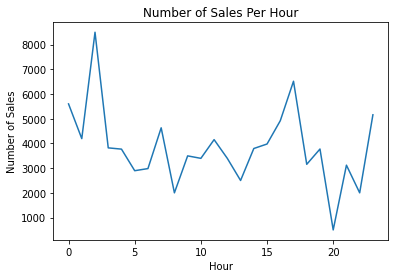

In [69]:
# see activity by hour

sales_by_hour = {}
for sale in sales:
    hour = datetime.strptime(sale.timestamp, '%Y-%m-%dT%H:%M:%SZ').hour
    if hour in sales_by_hour: sales_by_hour[hour] += 1
    else: sales_by_hour[hour] = 1

plt.plot(sales_by_hour.keys(), sales_by_hour.values())
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.title('Number of Sales Per Hour')
plt.show()

Name: More Loot
Symbol: MLOOT
Standard: ERC-721
USD Volume: 3455253.88
Description: None



Name: Meebits
Symbol: ⚇
Standard: ERC-721
USD Volume: 3220706.37
Description: The Meebits are 20,000 unique 3D voxel characters, created by a custom generative algorithm, then registered on the Ethereum blockchain.


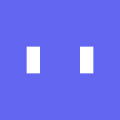




Name: Dreadfulz
Symbol: Dreadfulz
Standard: ERC-721
USD Volume: 2219754.49
Description: 73.5% Staked: 5719 (last updated 30/05/2022)

Holder count on Opensea is incorrect due to staking contract

Stake & Earn $DREAD: https://stake.dreadfulz.com

7,777 Dreadfulz have inked their name in fealty to the Grand Inquisitor. Bound by avarice, lustful for $DREAD.


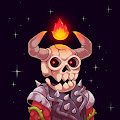




Name: ENS
Symbol: ENS
Standard: ERC-721
USD Volume: 1298625.73
Description: Ethereum Name Service (ENS) domains are secure domain names for the decentralized world. ENS domains provide a way for users to map human readable names to blockchain and non-blockchain resources, like Ethereum addresses, IPFS hashes, or website URLs. ENS domains can be bought and sold on secondary markets.


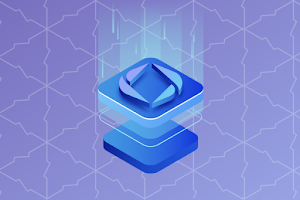




Name: BoredApeYachtClub
Symbol: BAYC
Standard: ERC-721
USD Volume: 841372.87
Description: The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of which is access to THE BATHROOM, a collaborative graffiti board. Future areas and perks can be unlocked by the community through roadmap activation. Visit www.BoredApeYachtClub.com for more details.


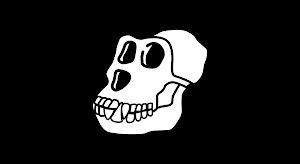




Name: Otherdeed
Symbol: OTHR
Standard: ERC-721
USD Volume: 833295.93
Description: Otherdeed is the key to claiming land in Otherside. Each have a unique blend of environment and sediment — some with resources, some home to powerful artifacts. And on a very few, a Koda roams.


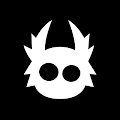




Name: OpenSea Shared Storefront
Symbol: OPENSTORE
Standard: ERC-1155
USD Volume: 597408.74
Description: Official Permissionless Gallery Collection

https://permissionlessevent.co


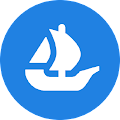




Name: CloneX
Symbol: CloneX
Standard: ERC-721
USD Volume: 520702.77
Description: 🧬 CLONE X 🧬

20,000 next-gen Avatars, by RTFKT and Takashi Murakami 🌸


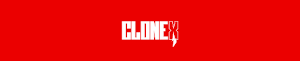




Name: Doodles
Symbol: DOODLE
Standard: ERC-721
USD Volume: 498024.4
Description: A community-driven collectibles project featuring art by Burnt Toast. Doodles come in a joyful range of colors, traits and sizes with a collection size of 10,000. Each Doodle allows its owner to vote for experiences and activations paid for by the Doodles Community Treasury.


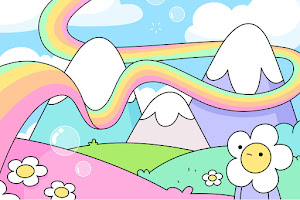




Name: MutantApeYachtClub
Symbol: MAYC
Standard: ERC-721
USD Volume: 488315.33
Description: The MUTANT APE YACHT CLUB is a collection of up to 20,000 Mutant Apes that can only be created by exposing an existing Bored Ape to a vial of MUTANT SERUM or by minting a Mutant Ape in the public sale.


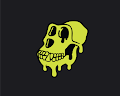

In [70]:
# top ten collections by USD volume today

usd_volume_by_collection = {}
for sale in sales:
    if sale.usd_price is None or sale.is_multi_token_sale:
        continue
    elif sale.contract_address in usd_volume_by_collection: 
        usd_volume_by_collection[sale.contract_address] += sale.usd_price
    else:
        usd_volume_by_collection[sale.contract_address] = sale.usd_price

top = sorted(usd_volume_by_collection.items(), key=lambda x: x[1], reverse=True)[:10]
collections = api.nft.collections_by_contract_address([t[0] for t in top])
volumes = [t[1] for t in top]

for collection, volume in zip(collections, volumes):
    print('Name: {}'.format(collection.name))
    print('Symbol: {}'.format(collection.symbol))
    print('Standard: {}'.format(collection.standard))
    print('USD Volume: {}'.format(round(volume, 2)))
    print('Description: {}'.format(collection.description))
    image = api.cdn.query(collection.image_url)
    if image is not None: display(image.image())
    print('\n\n')

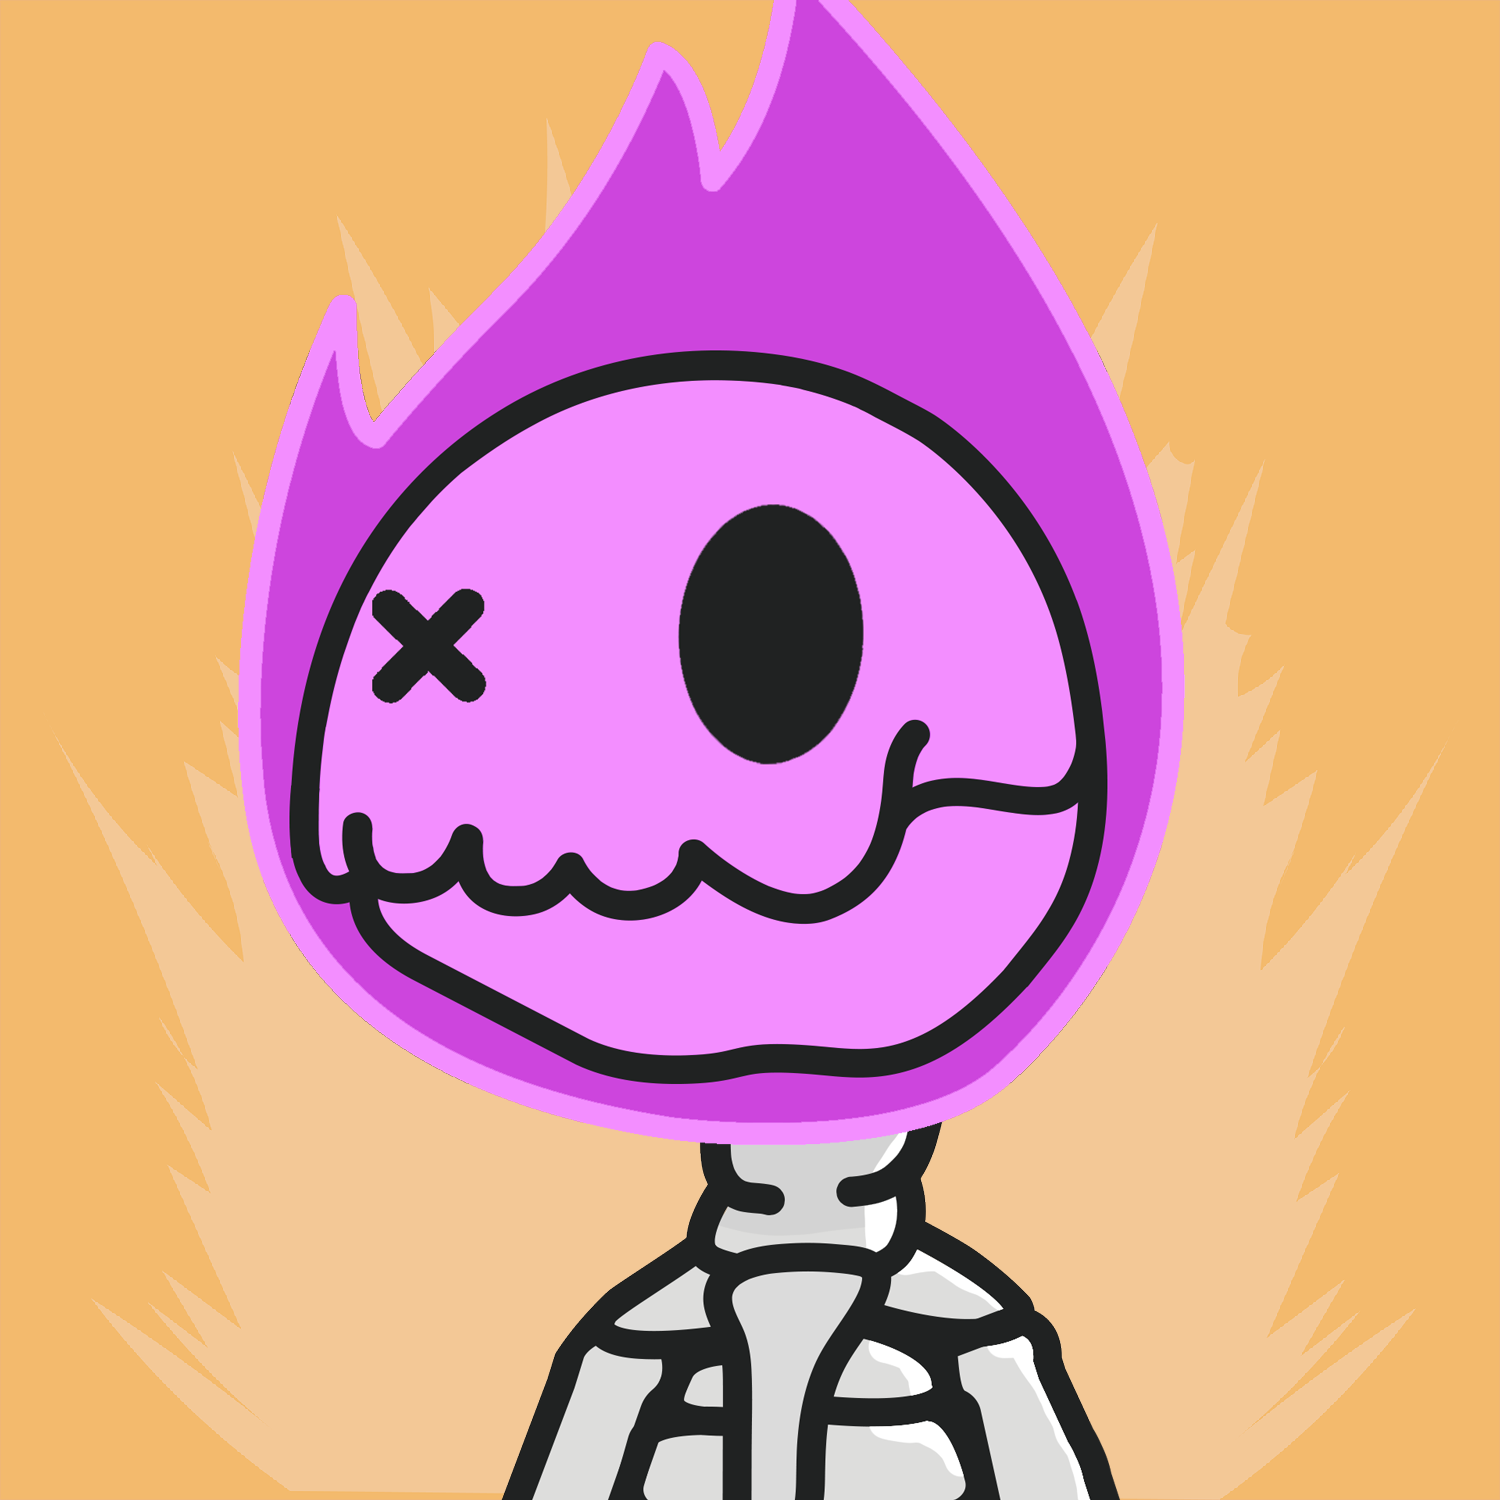

{
    "contract_address": "0x1347A97789cd3Aa0b11433E8117F55Ab640A0451",
    "token_id": 1,
    "name": "Long Lost #1",
    "description": "Long Lost is a 10,000 piece genesis collection from the '5th Dimension Collective'.",
    "minted_timestamp": "2022-02-05T22:28:18Z",
    "supply": 1,
    "approved_address": null,
    "image_url": "https://cdn.transpose.io/nft/0x1347A97789cd3Aa0b11433E8117F55Ab640A0451/1/image.png",
    "media_url": null,
    "external_url": null,
    "properties": [
        {
            "trait_type": "Backgrounds",
            "value": "Yellow Explosion"
        },
        {
            "trait_type": "Skeleton",
            "value": "Silver Skele"
        },
        {
            "trait_type": "Clothes",
            "value": "None"
        },
        {
            "trait_type": "Skeleton Special",
            "value": "Purple Flame Head"
        }
    ],
    "metadata_url": "https://cdn.transpose.io/nft/0x1347A97789cd3Aa0b11433E8117F55Ab640A0451/1/metadata.json",

In [71]:

# find the largest sale
nft = api.nft.nfts_by_token_id(
    contract_addresses=['0x1347A97789cd3Aa0b11433E8117F55Ab640A0451'], 
    token_ids=[1]
)[0]

image = api.cdn.query(nft.image_url)
if image is not None: display(image.image())
print(json.dumps(nft.to_dict(), indent=4))

# Demo 3: NFT Collection Holder Similarity Analysis

In [72]:
# start by retrieving top current holders
owners = api.bulk_request(api.nft.owners_by_contract_address(BORED_APE_CONTRACT_ADDRESS, limit=500), 20, 10000)

# let's create a dictionary of owners and their number of tokens
owners_by_token_count = {}
for owner in owners:
    if owner.owner not in owners_by_token_count:
        owners_by_token_count[owner.owner] = 0
    owners_by_token_count[owner.owner] += 1

# sort by number of tokens owned
sorted_holders = sorted(owners_by_token_count.items(), key=lambda x: x[1], reverse=True)

In [73]:
top_holder = sorted_holders[0]
top_owned_collections = {}

# get all the nfts owned by the top_holder
owned_nfts = api.bulk_request(api.nft.nfts_by_owner(top_holder[0], limit=500))
    
# get the contract address for each NFT and save the number of NFTs owned by each holder
for nft in owned_nfts:
    if nft.contract_address in top_owned_collections: top_owned_collections[nft.contract_address] += 1
    else: top_owned_collections[nft.contract_address] = 1

sorted_contract_addresses = sorted(top_owned_collections.items(), key=lambda x: x[1], reverse=True)
sorted_contract_addresses[:10]

named_contracts = {}
for contract_address in sorted_contract_addresses[:10]:
    name = api.nft.collections_by_contract_address(contract_address[0])[0].name
    named_contracts[name] = contract_address[1]

print(json.dumps(named_contracts, indent=4))

{
    "Otherside Gold Pass": 317,
    "BoredApeYachtClub": 263,
    "ApeFestPOAP.com": 164,
    "BAYC X OTHERSIDE LAND": 66,
    "Colorpencil Ape Club X BAYC": 62,
    "CRAYON CLUB X BAYC": 37,
    "Wagmi NFT Flyer": 32,
    "BEANZ": 25,
    "BAYC X Outside Land": 24
}


# Demo 4: Wallet NFT History

In [74]:
account = '0x383D4669F177182F2C8C90cecD291190EA04eDaD'

# retrieve all wallet NFTs
wallet_nfts = api.nft.nfts_by_owner(account, limit=500)

# retrieve all wallet NFT transfers
wallet_transfers = api.nft.transfers_by_account(account, limit=500)

# retrieve all wallet NFT sales
wallet_sales = api.nft.sales_by_account(account, limit=500)

# sort wallet NFT transfers
wallet_transfers_dict = {}
for transfer in wallet_transfers:
    nft_id = (transfer.contract_address, transfer.token_id)
    if nft_id not in wallet_transfers_dict: wallet_transfers_dict[nft_id] = [transfer]
    else: wallet_transfers_dict[nft_id].append(transfer)
        
# sort wallet NFT sales
wallet_sales_dict = {}
for sale in wallet_sales:
    nft_id = (sale.contract_address, sale.token_id)
    if nft_id not in wallet_sales_dict: wallet_sales_dict[nft_id] = [sale]
    else: wallet_sales_dict[nft_id].append(sale)

# analyze NFT ownership history
for nft in wallet_nfts:
    nft_id = (nft.contract_address, nft.token_id)
    transfers = wallet_transfers_dict.get(nft_id, [])
    sales = wallet_sales_dict.get(nft_id, [])
    print('====================================')
    print('Name: {}'.format(nft.name))
    print('Contract: {}'.format(nft.contract_address))
    print('Token ID: {}'.format(nft.token_id))
    print('Balance: {}'.format(nft.balance))
    print('History:\n')
    
    # order sales and transfers
    events = sales + transfers
    events = sorted(events, key=lambda x: x.timestamp)
    
    # filter out duplicate transaction hashes
    filtered_events = []
    last_transaction_hash = None
    for event in events:
        if event.transaction_hash != last_transaction_hash:
            filtered_events.append(event)
            last_transaction_hash = event.transaction_hash 
    
    # check if semi-fungible
    is_semi_fungible = bool(nft.balance > 1)
        
    # print all events
    for event in filtered_events:        
        if isinstance(event, NFTTransfer):
            event = event.to_dict()
            if event['category'] == 'mint':
                if is_semi_fungible: print('→ Minted {} on {}'.format(event['quantity'], to_friendly_dt(event['timestamp'])))
                else: print('→ Minted on {}'.format(to_friendly_dt(event['timestamp'])))
            elif event['category'] == 'burn':
                if is_semi_fungible: print('→ Burned {} on {}'.format(event['quantity'], to_friendly_dt(event['timestamp'])))
                else: print('→ Burned on {}'.format(to_friendly_dt(event['timestamp'])))
            elif event['to'] == account:
                if is_semi_fungible: print('→ Received {} from {} on {}'.format(event['quantity'], event['from'], to_friendly_dt(event['timestamp'])))
                else: print('→ Received from {} on {}'.format(event['from'], to_friendly_dt(event['timestamp'])))
            elif event['from'] == account:
                if is_semi_fungible: print('→ Sent {} to {} on {}'.format(event['quantity'], event['to'], to_friendly_dt(event['timestamp'])))
                else: print('→ Sent to {} on {}'.format(event['to'], to_friendly_dt(event['timestamp'])))
        else:
            event = event.to_dict()
            if event['buyer'] == account:
                if is_semi_fungible: print('→ Bought {} from {} for ${} on {}'.format(event['quantity'], event['seller'], event['usd_price'], to_friendly_dt(event['timestamp'])))
                else: print('→ Bought from {} for ${} on {}'.format(event['seller'], event['usd_price'], to_friendly_dt(event['timestamp'])))
            elif event['seller'] == account:
                if is_semi_fungible: print('→ Sold {} to {} for ${} on {}'.format(event['quantity'], event['buyer'], event['usd_price'], to_friendly_dt(event['timestamp'])))
                else: print('→ Sold to {} for ${} on {}'.format(event['buyer'], event['usd_price'], to_friendly_dt(event['timestamp'])))

    print('\n')

Name: Legend-X #585
Contract: 0x05A2B01a816ea0E63a0bd30B247b78953FB4b3e7
Token ID: 585
Balance: 1
History:

→ Received from 0xB20aBD5173Ed42B104d5A55039C98eE3277aA25B on May 15 2022


Name: 888 Genesis
Contract: 0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06
Token ID: 888
Balance: 1
History:

→ Bought from 0x37150eEe048E3F9a1d99eB8ACfBD14d5B8B3DEA5 for $213 on July 08 2022


Name: Gala Genesis Curry Flow: Warp
Contract: 0x9cA3A9a3aA59C7ddd61C29f6b0540ad9988AeDE6
Token ID: 4
Balance: 1
History:

→ Received from 0xcaF3F1e5C6b4Bce7131ca20ebD141d7C93528a89 on December 30 2021


Name: Gala Genesis Curry Flow: The Lab
Contract: 0x9cA3A9a3aA59C7ddd61C29f6b0540ad9988AeDE6
Token ID: 5
Balance: 1
History:

→ Received from 0xcaF3F1e5C6b4Bce7131ca20ebD141d7C93528a89 on December 30 2021


Name: Boat Captain VOX #2553
Contract: 0xad9Fd7cB4fC7A0fBCE08d64068f60CbDE22Ed34C
Token ID: 3137
Balance: 1
History:

→ Bought from 0x7165a04c41c9E5e67D4850EAB1Dc6eDE84D117F0 for $347.36 on September 11 2021


Name: M

# Demo 5: NFT Hotness Analysis

In [ ]:
START_DATE = parser.parse('2022-07-05')

args_list = []
for i in range(48):
    args_list.append({
        'sold_after': str(START_DATE + i * timedelta(hours=1)),
        'sold_before': str(START_DATE + (i + 1) * timedelta(hours=1) - timedelta(seconds=1)),
        'confirmed': True,
        'limit': 500
    })

sales = thread_ripper(api.nft.sales, args_list)
sales = sorted(sum(sales, []), key=lambda x: x.timestamp)

day1_sales = []
day2_sales = []
for sale in sales:
    date = parser.parse(sale.timestamp).strftime('%Y-%m-%d')
    if date == '2022-07-05':
        day1_sales.append(sale)
    elif date == '2022-07-06':
        day2_sales.append(sale)
    else:
        break

print('Retrieved {} NFT sales'.format(len(sales)))
print('Retrieved {} NFT sales on day 1'.format(len(day1_sales)))
print('Retrieved {} NFT sales on day 2'.format(len(day2_sales)))

In [ ]:
# see activity by hour

sales_by_hour = {}
for sale in sales:
    hour = datetime.strptime(sale.timestamp, '%Y-%m-%dT%H:%M:%SZ').hour
    if hour in sales_by_hour: sales_by_hour[hour] += 1
    else: sales_by_hour[hour] = 1

plt.plot(sales_by_hour.keys(), sales_by_hour.values())
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.title('Number of Sales Per Hour')
plt.show()

In [ ]:
# top five collections by USD volume

usd_volume_by_collection = {}
day1_volume_by_collection = {}
day2_volume_by_collection = {}
for sale in sales:
    if sale.usd_price is None or sale.is_multi_token_sale:
        continue
    date = parser.parse(sale.timestamp).strftime('%Y-%m-%d')
    if sale.contract_address in usd_volume_by_collection and sale.contract_address in day1_volume_by_collection and sale.contract_address in day2_volume_by_collection:
        if date == '2022-07-05':
            day1_volume_by_collection[sale.contract_address] += sale.usd_price
        elif date == '2022-07-06':
            day2_volume_by_collection[sale.contract_address] += sale.usd_price
        usd_volume_by_collection[sale.contract_address] += sale.usd_price
    else:
        if date == '2022-07-05':
            day1_volume_by_collection[sale.contract_address] = sale.usd_price
        elif date == '2022-07-06':
            day2_volume_by_collection[sale.contract_address] = sale.usd_price
        usd_volume_by_collection[sale.contract_address] = sale.usd_price

top = sorted(usd_volume_by_collection.items(), key=lambda x: x[1], reverse=True)[:3]
collections = api.nft.collections_by_contract_address([t[0] for t in top])
volumes = [t[1] for t in top]
total_sales_sum = sum(usd_volume_by_collection.values())
day1_sales_sum = sum(day1_volume_by_collection.values())
day2_sales_sum = sum(day2_volume_by_collection.values())

for collection, volume in zip(collections, volumes):
    print('Name: {}'.format(collection.name))
    print('Symbol: {}'.format(collection.symbol))
    print('Standard: {}'.format(collection.standard))
    print('USD Volume: {}'.format(round(volume, 2)))
    print('Description: {}'.format(collection.description))
    print('\n')

In [ ]:
# day 1 sales value share of bored ape sales vs total sales
day1_share = day1_volume_by_collection[BORED_APE_CONTRACT_ADDRESS] / day1_sales_sum
day1_volume_share = len([s for s in day1_sales if s.contract_address == BORED_APE_CONTRACT_ADDRESS]) / len(day1_sales)
print("Share of USD volume: {}".format(day1_share))
print("Share of number of sales: {}".format(day1_volume_share))

price_to_volume_ratio = day1_share / day1_volume_share
print("Price to volume ratio: {}".format(price_to_volume_ratio))

In [ ]:
CRYPTO_KITTIES_CONTRACT_ADDRESS = '0x06012c8cf97BEaD5deAe237070F9587f8E7A266d'
ck_day1_share = day1_volume_by_collection[CRYPTO_KITTIES_CONTRACT_ADDRESS] / day1_sales_sum
ck_day1_volume_share = len([s for s in day1_sales if s.contract_address == CRYPTO_KITTIES_CONTRACT_ADDRESS]) / len(day1_sales)
print("Share of USD volume: {}".format(ck_day1_share))
print("Share of number of sales: {}".format(ck_day1_volume_share))

ck_price_to_volume_ratio = ck_day1_share / ck_day1_volume_share
print("Price to volume ratio: {}".format(ck_price_to_volume_ratio))

# Hot New Mints

In [ ]:
# Retrieve fifteen minutes worth of mints
START_DATE = parser.parse('2022-07-05')
mints = api.bulk_request(api.nft.transfers(transferred_after=str(START_DATE), transferred_before=str(START_DATE + timedelta(minutes=15)), transfer_category='mint', limit=500), 20, 100000)

# Aggregate mints by contract address
mints_by_contract_address = {}
for mint in mints:
    if mint.contract_address in mints_by_contract_address:
        mints_by_contract_address[mint.contract_address] += mint.quantity
    else:
        mints_by_contract_address[mint.contract_address] = mint.quantity

# sort
mints_by_contract_address = sorted(mints_by_contract_address.items(), key=lambda x: x[1], reverse=True)

# display top 3 mints
for mint in mints_by_contract_address[:3]:
    collection_name = api.nft.collections_by_contract_address(mint[0])[0].name
    print("{} mints of {}".format(mint[1], collection_name))